In [14]:
#04/02/2019
import numpy as np # Algebre linéaire
import pandas as pd # Data processing, CSV

from PIL import Image # Image display
import matplotlib.pyplot as plt

from io import BytesIO # Image request
import requests

import bq_helper # Data train querry
from bq_helper import BigQueryHelper

import os

In [15]:
def images_from_url(url):
    response = requests.get(url)
    return Image.open(BytesIO(response.content))

In [16]:
open_images = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="open_images")
bq_assistant = BigQueryHelper("bigquery-public-data", "open_images")

# Liste des tables :
#['annotations_bbox', 'dict', 'images', 'labels']

Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.


In [45]:
subQueryImages = """
(SELECT image_id, original_url
FROM `bigquery-public-data.open_images.images`)
"""

subQueryBox = """
(SELECT image_id, label_name, x_min, x_max, y_min, y_max
FROM `bigquery-public-data.open_images.annotations_bbox`
ORDER BY image_id
LIMIT 100000)
"""

subQueryWord = """
(SELECT label_name, label_display_name
FROM `bigquery-public-data.open_images.dict`)
"""

mainQuery = """
SELECT img.image_id, img.original_url, wrd.label_display_name, box.label_name, box.x_min, box.x_max, box.y_min, box.y_max
FROM """ + subQueryImages + """ img
INNER JOIN """ + subQueryBox + """ box ON img.image_id = box.image_id
INNER JOIN """ + subQueryWord + """wrd ON box.label_name = wrd.label_name
ORDER BY img.image_id
"""

labelQuery = """
SELECT ROW_NUMBER(), label_name, label_display_name
FROM (SELECT DISTINCT(label_name) FROM """ + subQueryBox + """) lab
JOIN """ + subQueryWord + """ wrd ON lab.label_name = wrd.label_name"""



dataset = open_images.query_to_pandas_safe(mainQuery)
labelUnique = open_images.query_to_pandas_safe(labelQuery)

"""
for i in range(0, 10):
    plt.imshow(images_from_url(dataset.original_url[i]))
    plt.show()
    print(dataset.label_display_name[i])
    print(dataset.original_url[i])"""

BadRequest: 400 POST https://dp.kaggle.net/bigquery/v2/projects/kaggle-161607/jobs: Analytic function ROW_NUMBER cannot be called without an OVER clause at [2:8]

In [ ]:
print(labelUnique)

In [42]:
"""
file = images_from_url(dataset.original_url[120])

tmp = np.array(file.resize((100, 100)))
plt.imshow(tmp)
plt.show()
print(dataset.label_display_name[120])
"""

features = []
labels = []

# dataset.label_name.size
data_length = 10

for data_ex in range (0, data_length):
    features.append(np.array(images_from_url(dataset.original_url[data_ex]).resize((100, 100))))
    labels.append([[dataset.label_name[data_ex]],[dataset.x_min[data_ex], dataset.y_min[data_ex], dataset.x_max[data_ex], dataset.y_max[data_ex]]])

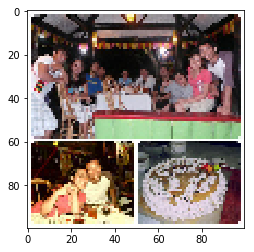

[['/m/0284d'], [0.522, 0.675, 0.917, 0.966]]


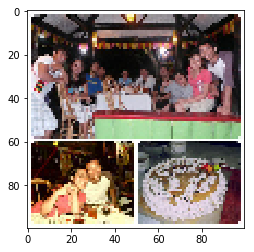

[['/m/052lwg6'], [0.522, 0.675, 0.917, 0.966]]


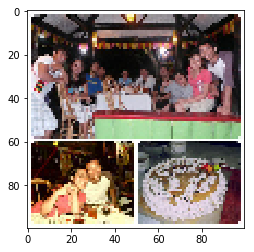

[['/m/0hnyx'], [0.522, 0.675, 0.917, 0.966]]


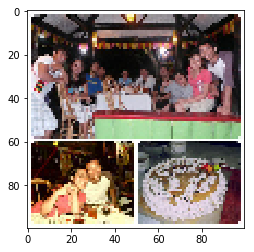

[['/m/0270h'], [0.522, 0.675, 0.917, 0.966]]


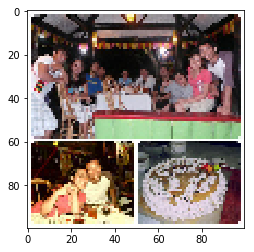

[['/m/0fszt'], [0.51, 0.642, 0.98, 0.987]]


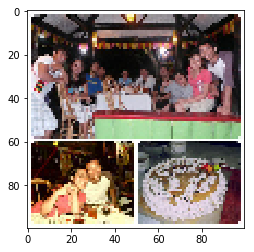

[['/m/01mzpv'], [0.009, 0.75, 0.119, 0.92]]


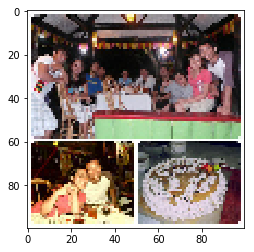

[['/m/0284d'], [0.56, 0.696, 0.951, 1.0]]


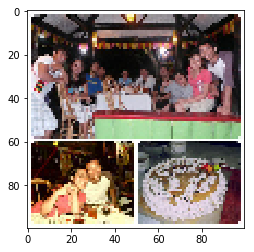

[['/m/0c_jw'], [0.019, 0.767, 0.098, 0.892]]


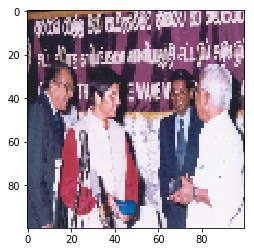

[['/m/01rkbr'], [0.671, 0.498, 0.725, 0.72]]


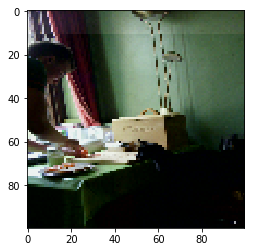

[['/m/03hlz0c'], [0.08, 0.709, 0.294, 0.761]]


In [43]:
for tmp in range(0, 10):
    plt.imshow(features[tmp])
    plt.show()
    print(labels[tmp])